# Explore here

In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split


In [ ]:
# STEP 1: LOAD DATA
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data.to_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", index = False)

In [ ]:
# STEP 2: EXPLORE DATA
total_data.shape

(768, 9)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No Nan records

9 Numerical Characteristics

In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

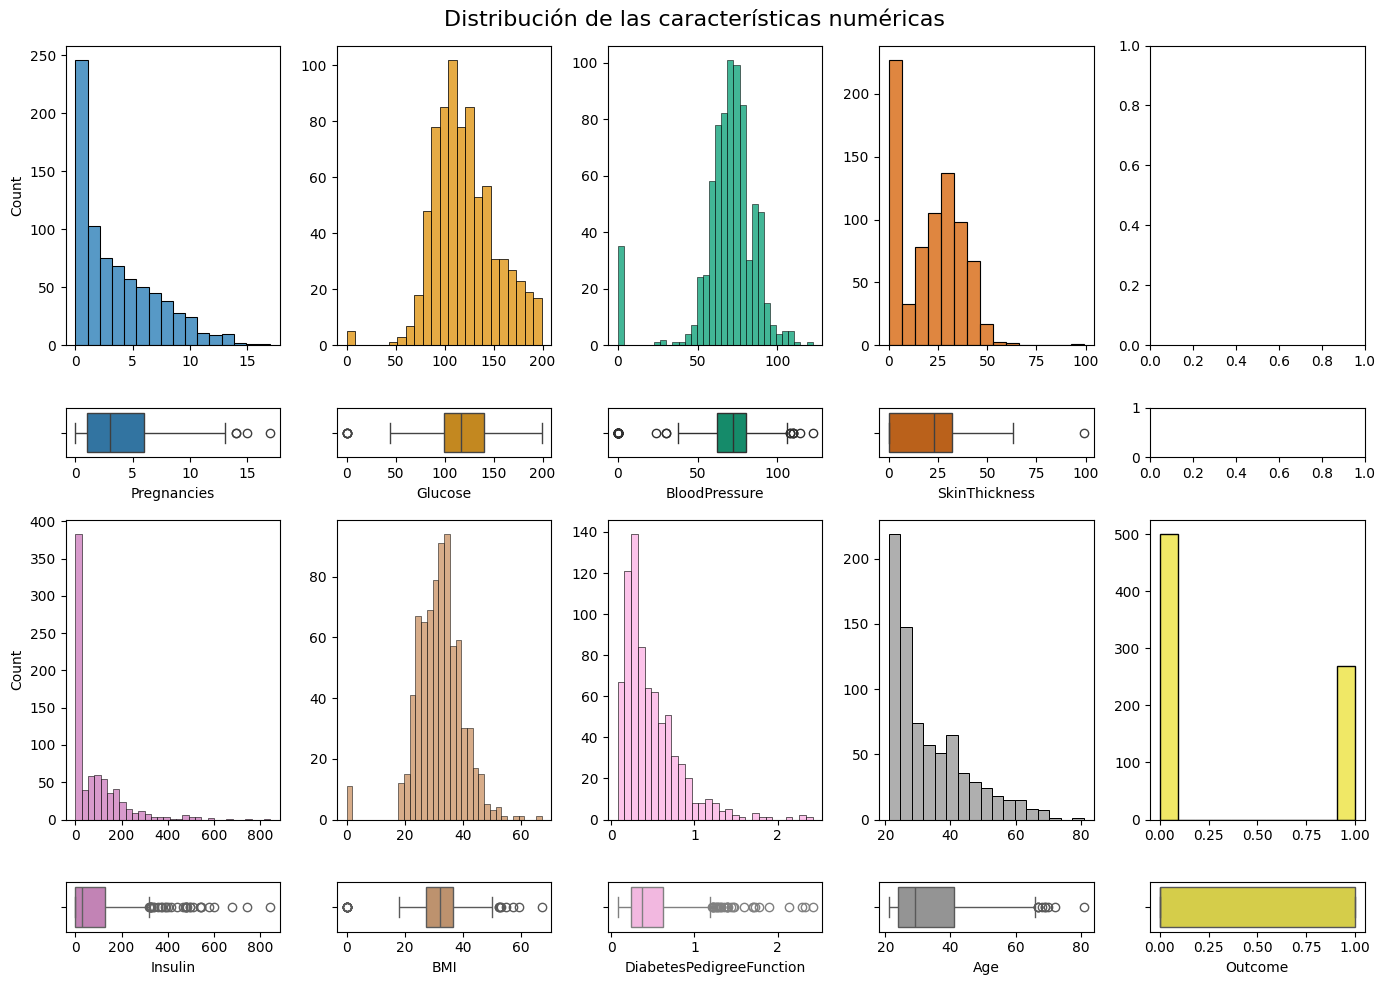

In [ ]:
# STEP 3: UNIVARIATE VARIABLE ANALYSIS

# NUMERICAL ANALYSIS
fig, axis = plt.subplots(4, 5, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns. color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7])

sns.histplot(ax = axis[2, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8]). set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8])

plt. tight_layout()
plt. show

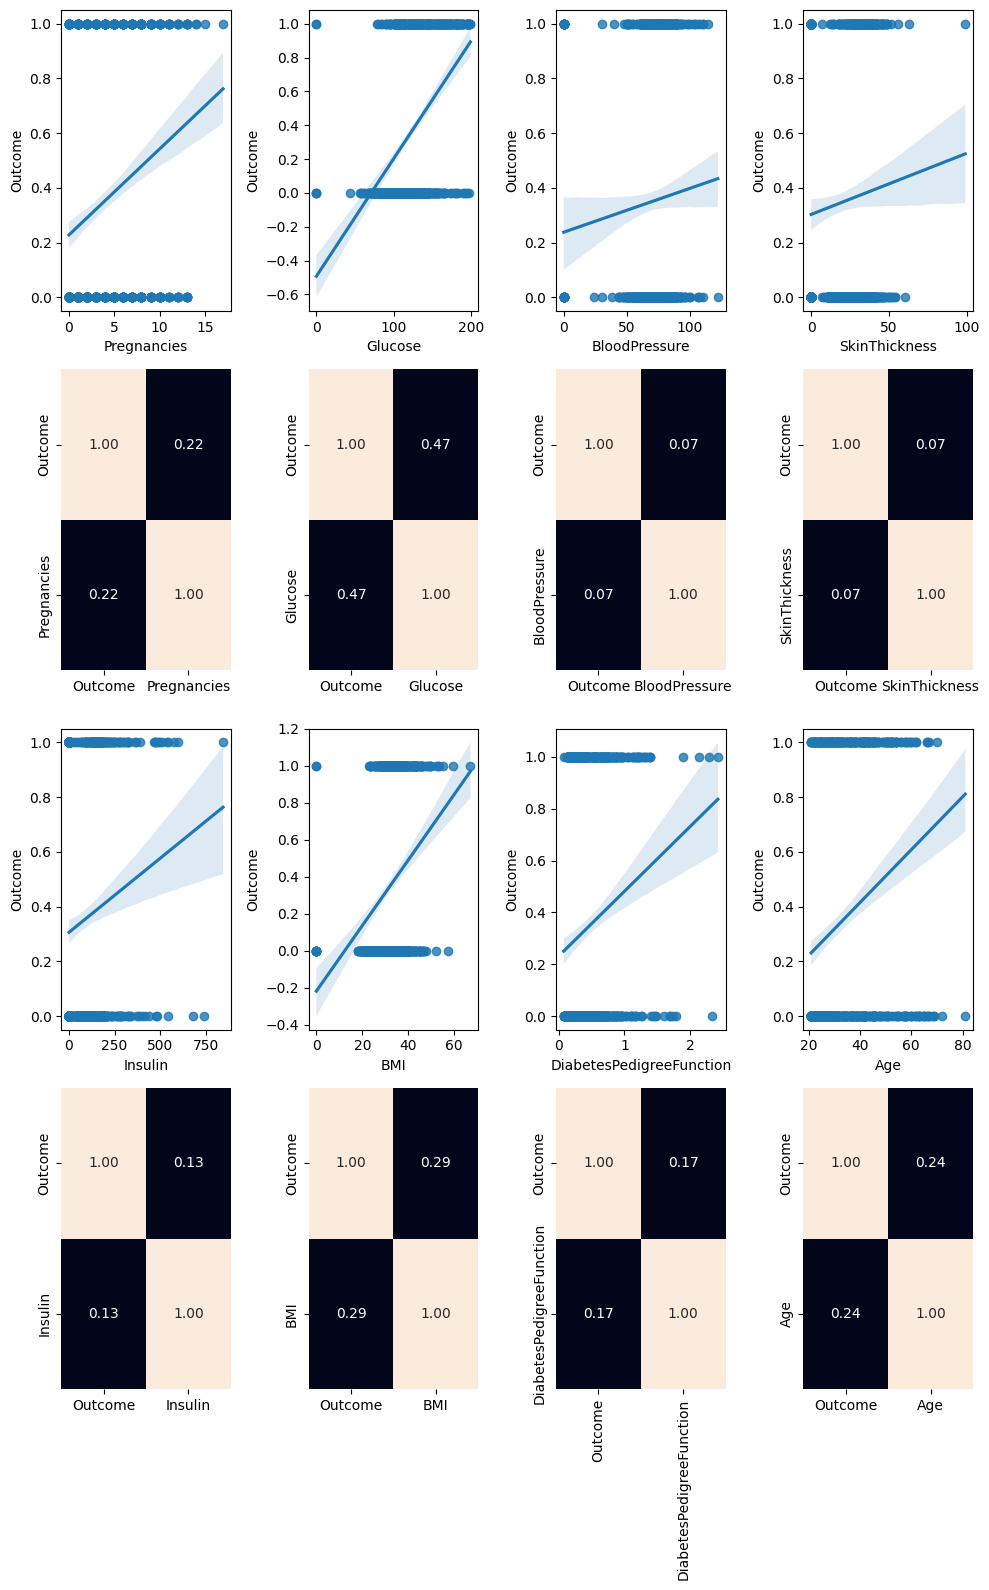

In [9]:
# NUMERICAL-NUMERICAL ANALYSIS
fig, axis = plt.subplots(4, 4, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "Glucose", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", y = "Outcome")
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_data, x = "SkinThickness", y = "Outcome")
sns.heatmap(total_data[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

sns.regplot(ax = axis[2, 0], data = total_data, x = "Insulin", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "BMI", y = "Outcome")
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = total_data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

sns.regplot(ax = axis[2, 3], data = total_data, x = "Age", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)

plt.tight_layout()

plt.show()

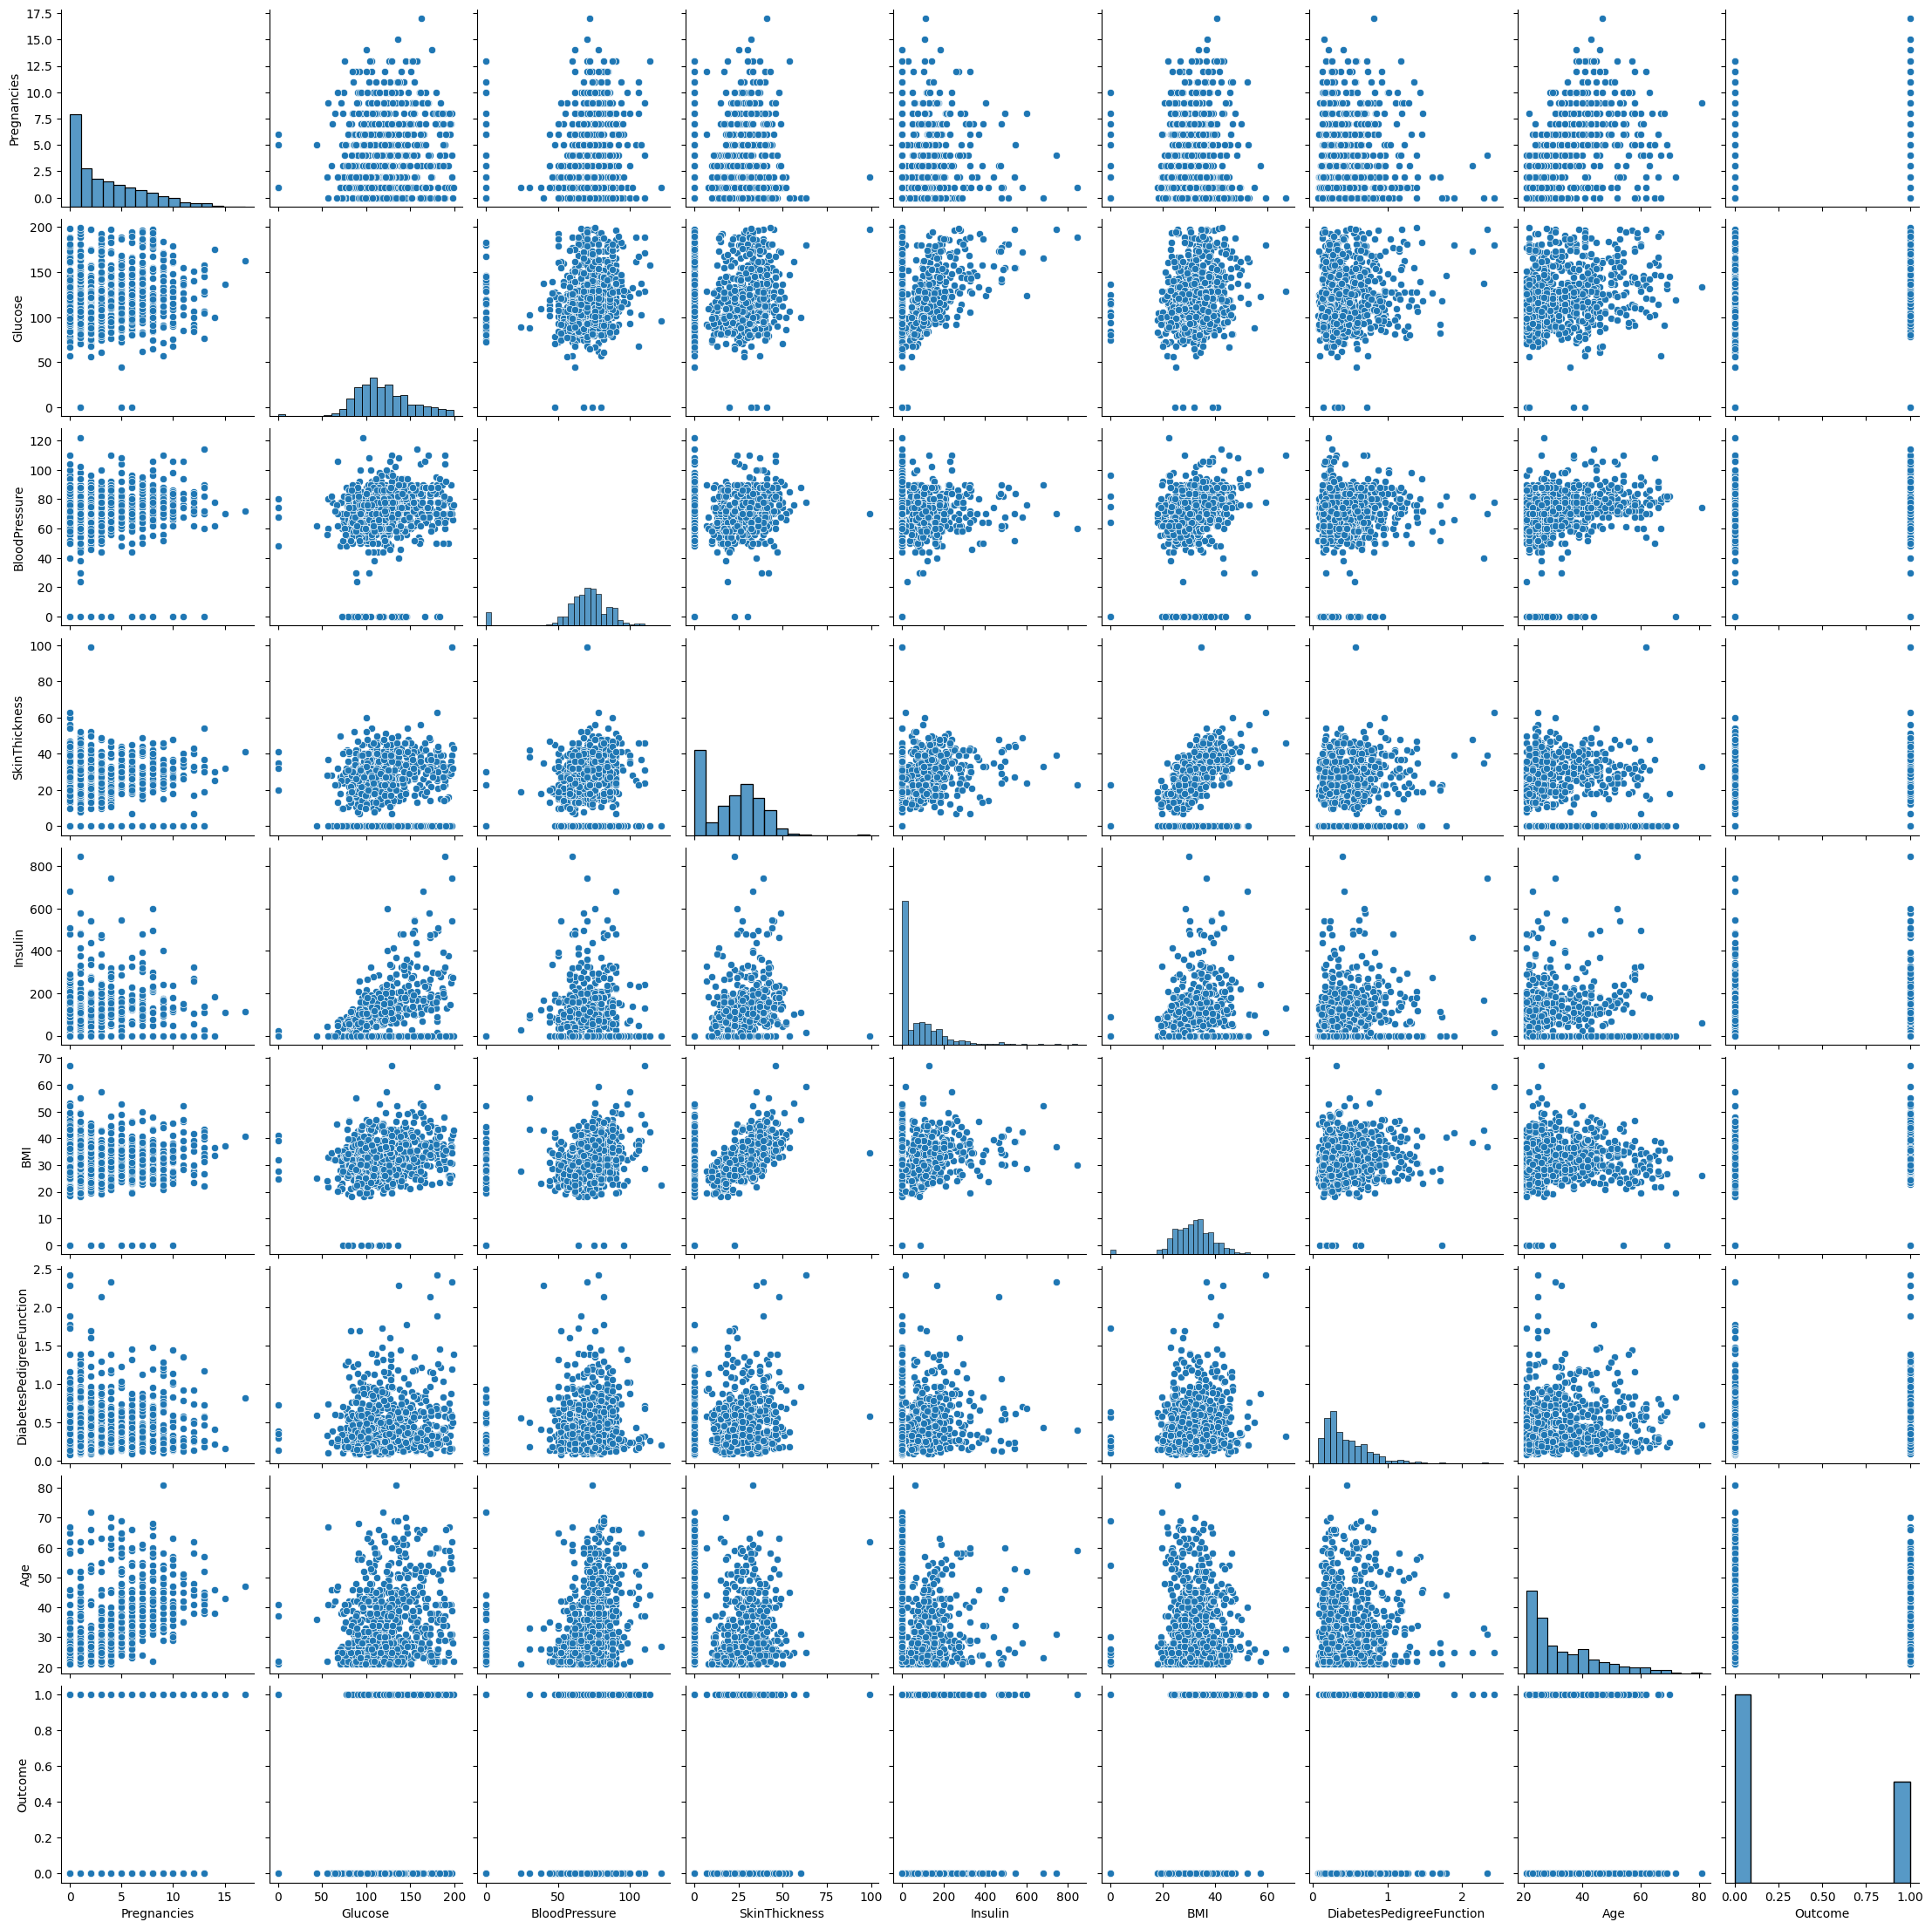

In [10]:
sns.pairplot(data = total_data)

In [13]:
# STEP 5: FEATURE ENGINEERING

# OUTLIER ANALYSIS
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


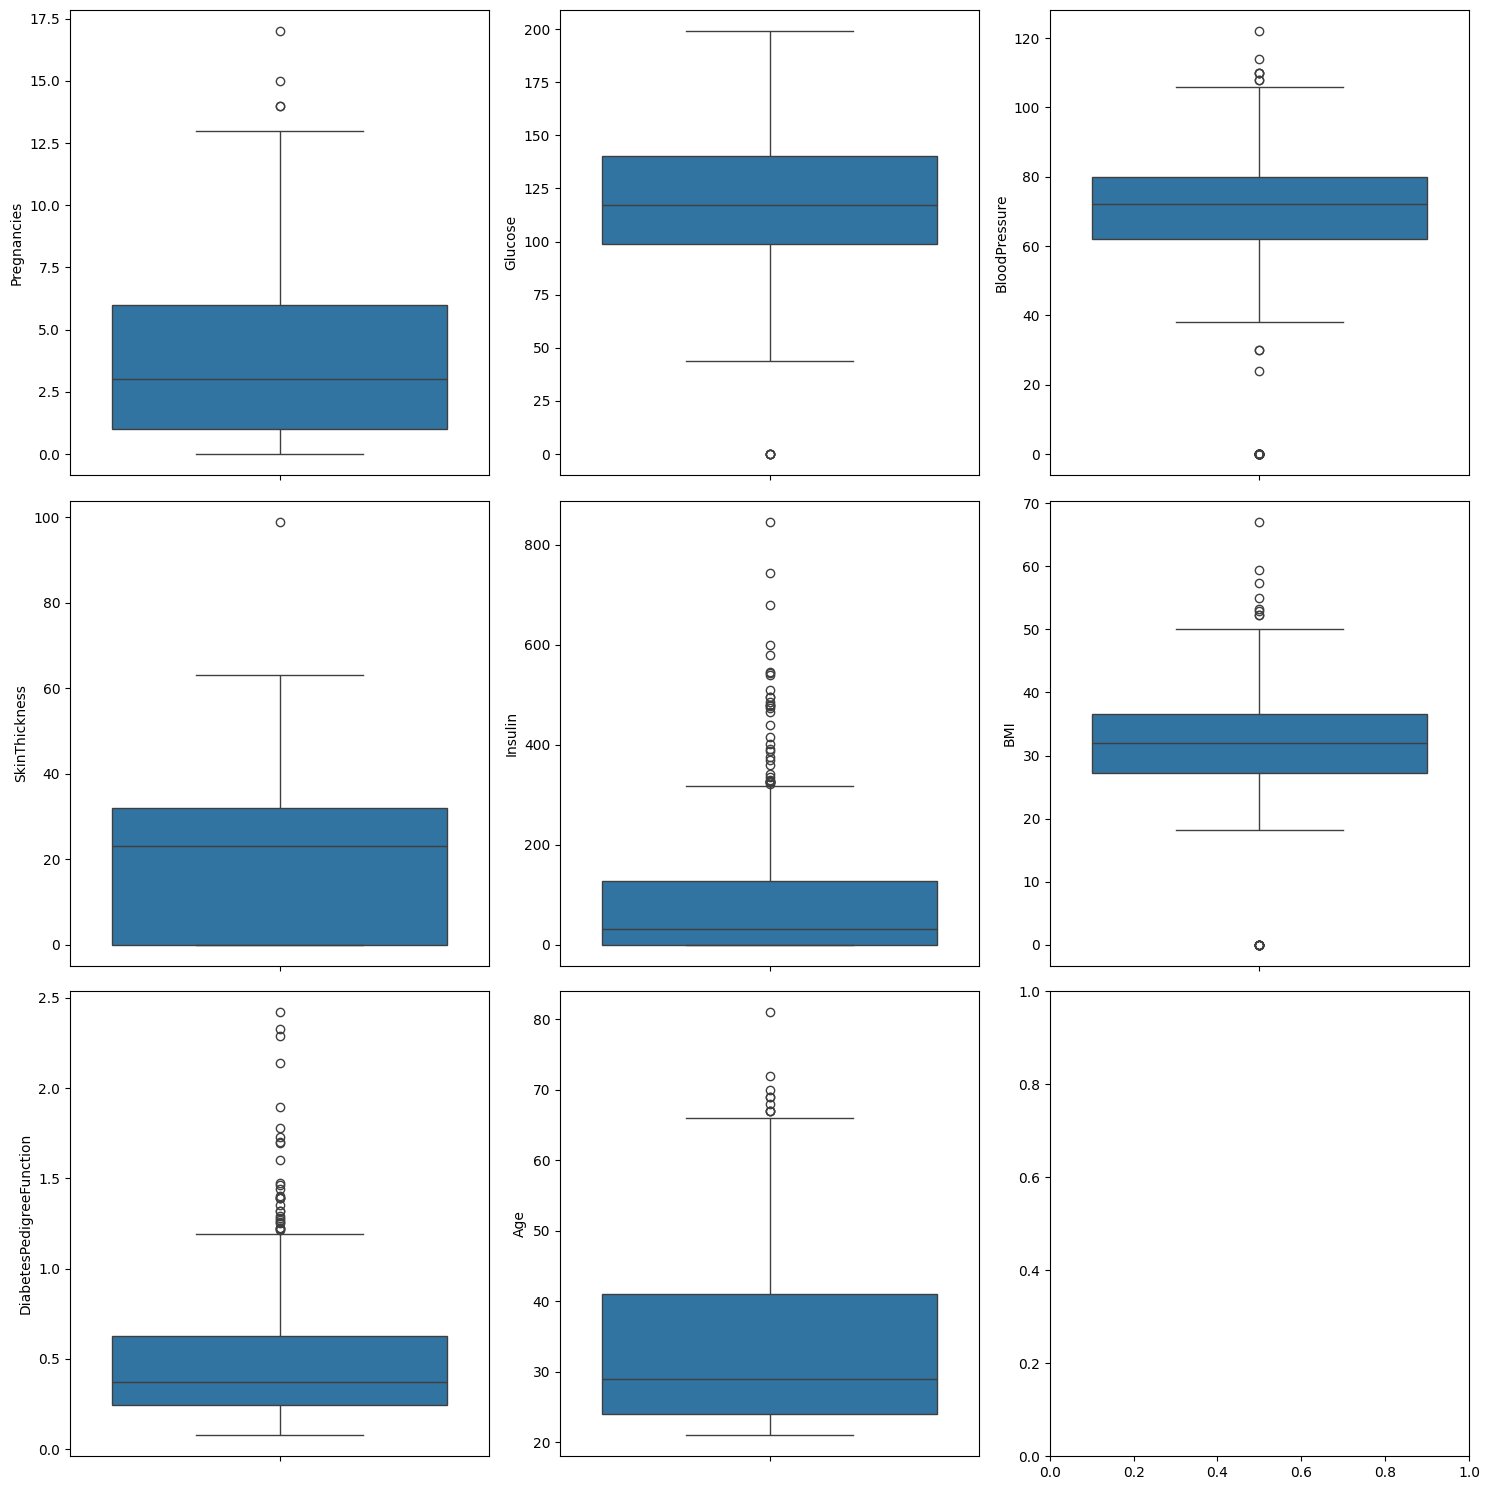

In [21]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "Age")

plt.tight_layout()

plt.show()

In [22]:
# OUTLIER DETECTION FOR AGE
    # AGE STATS
age_stats = total_data["Age"].describe()
age_stats

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
    # AGE IQR
age_iqr = age_stats["75%"] - age_stats["25%"]

upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 66.5 and -1.5, with an interquartile range of 17.0


In [19]:
    # CLEAN OUTLIERS
total_data = total_data[total_data["Age"] > 0]

In [20]:
count_0 = total_data[total_data["Age"] == 0].shape[0]
count_1 = total_data[total_data["Age"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [23]:
# FEATURE SCALING
num_variables = ["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["Age"] = total_data["Age"]
df_scal.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.353535,0.198582,0.642325,0.943638,33


In [25]:
# STEP 6: FEATURE SELECTION
X = df_scal.drop("Age", axis = 1)
y = df_scal["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.096499
1,0.529412,0.562814,0.242424,0.000000,0.420268,0.514091
2,0.058824,0.698492,0.191919,0.098109,0.427720,0.245944
3,0.000000,0.809045,0.000000,0.000000,0.326379,0.075149
4,0.352941,0.673367,0.373737,0.437352,0.688525,0.068318


In [31]:
X_train_sel["Age"] = list(y_train)
X_test_sel["Age"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [32]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


1.0
0.03896103896103896


** Decision Making Note
La precisión es elevada para train y test → Temino
La precisión es baja para train y test → Modelo no adecuado
La precisión es elevada para train y baja para test → Fenómeno de Overfitting